In [1]:
import pandas as pd
import os
import numpy as np
from scipy.stats import pearsonr

Precipitaion

In [3]:


# List of locations
locations = ['Aberdeen','Ashton','Idaho Falls','Rupert','Soda Springs']




#locations = ['Almira','Anatone']

result_dfs = []  

for location in locations:
    climate_df = pd.read_excel(f'./{location}_precip.xlsx')  
    f1_T = climate_df.set_index('window').transpose()

    trait_df = pd.read_excel(f'./{location}_Grain_yield.xlsx')
    df1_transposed = trait_df.set_index('Location').transpose()
    df1_melted = df1_transposed.melt(value_name='Value', var_name='Location')

    # Set a common index for both DataFrames
    f1_T.index = df1_melted.index
    
    # Concatenate side-by-side here
    result_df = pd.concat([f1_T, df1_melted], axis=1) 
    
    result_dfs.append(result_df)

final_result = pd.concat(result_dfs, ignore_index=True)
# Remove rows containing NaN values
final_result = final_result.dropna()


del final_result['Location']
#print(final_result)
#final_result.to_excel('./ress.xlsx')


# Initialize the list before the loop
correlation_dfs = []

# Calculate correlation and p-value for each column with 'Value' (excluding 'Location')
correlation_values = []
p_values = []
for column in final_result.columns:
    if column != 'Value':
        correlation, p_value = pearsonr(final_result[column], final_result['Value'])
        correlation_values.append(correlation)
        p_values.append(p_value)

# Create a DataFrame with correlation and p-value for each column
correlation_df = pd.DataFrame({
    'Column': final_result.columns[~final_result.columns.isin(['Value'])],  # Exclude 'Value' column
    'Correlation': correlation_values,
    'P-Value': p_values
})

correlation_dfs.append(correlation_df)

final_correlation_result = pd.concat(correlation_dfs, ignore_index=True)

print(final_correlation_result)


#final_correlation_result.to_excel('./correlation_result.xlsx')
    
final_correlation_result[['precip', 'x', 'y']] = final_correlation_result['Column'].str.extract(r'(\D+)-(\d+)-(\d+)')
final_correlation_result['x'] = final_correlation_result['x'].astype(int)
final_correlation_result['y'] = final_correlation_result['y'].astype(int)

final_correlation_result['sum'] = final_correlation_result['x'] + final_correlation_result['y']
final_correlation_result['avg'] = (final_correlation_result['x'] + final_correlation_result['y']) / 2

# Filter rows where (x + y) is an even number
df_even_sum = final_correlation_result[final_correlation_result['sum'] % 2 == 0]

# Define a function to get the row with the maximum correlation (positive or negative)
def get_max_correlation_row(group):
    if group['P-Value'].max() >= abs(group['P-Value'].min()):
        return group.loc[group['P-Value'].idxmax()]
    else:
        return group.loc[group['P-Value'].idxmin()]

# Apply the function to each group
result_df_precip = df_even_sum.groupby('avg').apply(get_max_correlation_row)
# Calculate -log(P-Value) and add it as a new column
result_df_precip['-log(P-Value)'] = -np.log(result_df_precip['P-Value'])








   



               Column  Correlation   P-Value
0          precip-1-6     0.093641  0.107884
1          precip-1-7     0.122362  0.035362
2          precip-1-8     0.155310  0.007428
3          precip-1-9     0.172663  0.002878
4         precip-1-10     0.186082  0.001300
...               ...          ...       ...
11320  precip-148-150     0.146171  0.011812
11321  precip-148-151     0.172560  0.002895
11322  precip-149-150     0.118513  0.041596
11323  precip-149-151     0.151377  0.009096
11324  precip-150-151     0.128495  0.027069

[11325 rows x 3 columns]


Temperature

In [5]:


# List of locations
locations = ['Aberdeen','Ashton','Idaho Falls','Rupert','Soda Springs']




#locations = ['Almira','Anatone']

result_dfs = []  

for location in locations:
    climate_df = pd.read_excel(f'./{location}_Tavg.xlsx')  
    f1_T = climate_df.set_index('window').transpose()

    trait_df = pd.read_excel(f'./{location}_Grain_yield.xlsx')
    df1_transposed = trait_df.set_index('Location').transpose()
    df1_melted = df1_transposed.melt(value_name='Value', var_name='Location')

    # Set a common index for both DataFrames
    f1_T.index = df1_melted.index
    
    # Concatenate side-by-side here
    result_df = pd.concat([f1_T, df1_melted], axis=1) 
    
    result_dfs.append(result_df)

final_result = pd.concat(result_dfs, ignore_index=True)
# Remove rows containing NaN values
final_result = final_result.dropna()


del final_result['Location']
#print(final_result)
#final_result.to_excel('./ress.xlsx')


# Initialize the list before the loop
correlation_dfs = []

# Calculate correlation and p-value for each column with 'Value' (excluding 'Location')
correlation_values = []
p_values = []
for column in final_result.columns:
    if column != 'Value':
        correlation, p_value = pearsonr(final_result[column], final_result['Value'])
        correlation_values.append(correlation)
        p_values.append(p_value)

# Create a DataFrame with correlation and p-value for each column
correlation_df = pd.DataFrame({
    'Column': final_result.columns[~final_result.columns.isin(['Value'])],  # Exclude 'Value' column
    'Correlation': correlation_values,
    'P-Value': p_values
})

correlation_dfs.append(correlation_df)

final_correlation_result = pd.concat(correlation_dfs, ignore_index=True)

print(final_correlation_result)


#final_correlation_result.to_excel('./correlation_result.xlsx')
    
final_correlation_result[['Tavg', 'x', 'y']] = final_correlation_result['Column'].str.extract(r'(\D+)-(\d+)-(\d+)')
final_correlation_result['x'] = final_correlation_result['x'].astype(int)
final_correlation_result['y'] = final_correlation_result['y'].astype(int)

final_correlation_result['sum'] = final_correlation_result['x'] + final_correlation_result['y']
final_correlation_result['avg'] = (final_correlation_result['x'] + final_correlation_result['y']) / 2

# Filter rows where (x + y) is an even number
df_even_sum = final_correlation_result[final_correlation_result['sum'] % 2 == 0]

# Define a function to get the row with the maximum correlation (positive or negative)
def get_max_correlation_row(group):
    if group['P-Value'].max() >= abs(group['P-Value'].min()):
        return group.loc[group['P-Value'].idxmax()]
    else:
        return group.loc[group['P-Value'].idxmin()]

# Apply the function to each group
result_df_Tavg= df_even_sum.groupby('avg').apply(get_max_correlation_row)
# Calculate -log(P-Value) and add it as a new column
result_df_Tavg['-log(P-Value)'] = -np.log(result_df_Tavg['P-Value'])

# Print the result
#result_df

#plot
####################################################################






   



             Column  Correlation   P-Value
0          Tavg-1-2    -0.188410  0.000840
1          Tavg-1-3    -0.198592  0.000426
2          Tavg-1-4    -0.202192  0.000333
3          Tavg-1-5    -0.215626  0.000127
4          Tavg-1-6    -0.234471  0.000030
...             ...          ...       ...
11320  Tavg-148-150    -0.036501  0.521308
11321  Tavg-148-151    -0.037504  0.509925
11322  Tavg-149-150    -0.040127  0.480758
11323  Tavg-149-151    -0.039707  0.485371
11324  Tavg-150-151    -0.037088  0.514635

[11325 rows x 3 columns]


In [6]:


# List of locations
locations = ['Aberdeen','Ashton','Idaho Falls','Rupert','Soda Springs']




#locations = ['Almira','Anatone']

result_dfs = []  

for location in locations:
    climate_df = pd.read_excel(f'./{location}_gdd.xlsx')  
    f1_T = climate_df.set_index('window').transpose()

    trait_df = pd.read_excel(f'./{location}_Grain_yield.xlsx')
    df1_transposed = trait_df.set_index('Location').transpose()
    df1_melted = df1_transposed.melt(value_name='Value', var_name='Location')

    # Set a common index for both DataFrames
    f1_T.index = df1_melted.index
    
    # Concatenate side-by-side here
    result_df = pd.concat([f1_T, df1_melted], axis=1) 
    
    result_dfs.append(result_df)

final_result = pd.concat(result_dfs, ignore_index=True)
# Remove rows containing NaN values
final_result = final_result.dropna()


del final_result['Location']
#print(final_result)
#final_result.to_excel('./ress.xlsx')


# Initialize the list before the loop
correlation_dfs = []

# Calculate correlation and p-value for each column with 'Value' (excluding 'Location')
correlation_values = []
p_values = []
for column in final_result.columns:
    if column != 'Value':
        correlation, p_value = pearsonr(final_result[column], final_result['Value'])
        correlation_values.append(correlation)
        p_values.append(p_value)

# Create a DataFrame with correlation and p-value for each column
correlation_df = pd.DataFrame({
    'Column': final_result.columns[~final_result.columns.isin(['Value'])],  # Exclude 'Value' column
    'Correlation': correlation_values,
    'P-Value': p_values
})

correlation_dfs.append(correlation_df)

final_correlation_result = pd.concat(correlation_dfs, ignore_index=True)

print(final_correlation_result)


#final_correlation_result.to_excel('./correlation_result.xlsx')
    
final_correlation_result[['gdd', 'x', 'y']] = final_correlation_result['Column'].str.extract(r'(\D+)-(\d+)-(\d+)')
final_correlation_result['x'] = final_correlation_result['x'].astype(int)
final_correlation_result['y'] = final_correlation_result['y'].astype(int)

final_correlation_result['sum'] = final_correlation_result['x'] + final_correlation_result['y']
final_correlation_result['avg'] = (final_correlation_result['x'] + final_correlation_result['y']) / 2

# Filter rows where (x + y) is an even number
df_even_sum = final_correlation_result[final_correlation_result['sum'] % 2 == 0]

# Define a function to get the row with the maximum correlation (positive or negative)
def get_max_correlation_row(group):
    if group['P-Value'].max() >= abs(group['P-Value'].min()):
        return group.loc[group['P-Value'].idxmax()]
    else:
        return group.loc[group['P-Value'].idxmin()]

# Apply the function to each group
result_df_gdd= df_even_sum.groupby('avg').apply(get_max_correlation_row)
# Calculate -log(P-Value) and add it as a new column
result_df_gdd['-log(P-Value)'] = -np.log(result_df_gdd['P-Value'])

# Print the result
#result_df

#plot
####################################################################






   



            Column  Correlation   P-Value
0          gdd-1-2    -0.188410  0.000840
1          gdd-1-3    -0.198592  0.000426
2          gdd-1-4    -0.202192  0.000333
3          gdd-1-5    -0.215626  0.000127
4          gdd-1-6    -0.234599  0.000029
...            ...          ...       ...
11320  gdd-148-150    -0.008828  0.876779
11321  gdd-148-151    -0.016570  0.771000
11322  gdd-149-150    -0.015394  0.786853
11323  gdd-149-151    -0.023202  0.683585
11324  gdd-150-151    -0.025473  0.654521

[11325 rows x 3 columns]


DGDD

In [7]:

# List of locations
locations = ['Aberdeen','Ashton','Idaho Falls','Rupert','Soda Springs']


  

#locations = ['Almira','Anatone']

result_dfs = []  

for location in locations:
    climate_df = pd.read_excel(f'./{location}_dgdd.xlsx')  
    f1_T = climate_df.set_index('window').transpose()

    trait_df = pd.read_excel(f'./{location}_Grain_yield.xlsx')
    df1_transposed = trait_df.set_index('Location').transpose()
    df1_melted = df1_transposed.melt(value_name='Value', var_name='Location')

    # Set a common index for both DataFrames
    f1_T.index = df1_melted.index
    
    # Concatenate side-by-side here
    result_df = pd.concat([f1_T, df1_melted], axis=1) 
    
    result_dfs.append(result_df)

final_result = pd.concat(result_dfs, ignore_index=True)
# Remove rows containing NaN values
final_result = final_result.dropna()


del final_result['Location']
#print(final_result)
#final_result.to_excel('./ress.xlsx')


# Initialize the list before the loop
correlation_dfs = []

# Calculate correlation and p-value for each column with 'Value' (excluding 'Location')
correlation_values = []
p_values = []
for column in final_result.columns:
    if column != 'Value':
        correlation, p_value = pearsonr(final_result[column], final_result['Value'])
        correlation_values.append(correlation)
        p_values.append(p_value)

# Create a DataFrame with correlation and p-value for each column
correlation_df = pd.DataFrame({
    'Column': final_result.columns[~final_result.columns.isin(['Value'])],  # Exclude 'Value' column
    'Correlation': correlation_values,
    'P-Value': p_values
})

correlation_dfs.append(correlation_df)

final_correlation_result = pd.concat(correlation_dfs, ignore_index=True)

print(final_correlation_result)


#final_correlation_result.to_excel('./correlation_result.xlsx')
    
final_correlation_result[['dgdd', 'x', 'y']] = final_correlation_result['Column'].str.extract(r'(\D+)-(\d+)-(\d+)')
final_correlation_result['x'] = final_correlation_result['x'].astype(int)
final_correlation_result['y'] = final_correlation_result['y'].astype(int)

final_correlation_result['sum'] = final_correlation_result['x'] + final_correlation_result['y']
final_correlation_result['avg'] = (final_correlation_result['x'] + final_correlation_result['y']) / 2

# Filter rows where (x + y) is an even number
df_even_sum = final_correlation_result[final_correlation_result['sum'] % 2 == 0]

# Define a function to get the row with the maximum correlation (positive or negative)
def get_max_correlation_row(group):
    if group['P-Value'].max() >= abs(group['P-Value'].min()):
        return group.loc[group['P-Value'].idxmax()]
    else:
        return group.loc[group['P-Value'].idxmin()]

# Apply the function to each group
result_df_dgdd= df_even_sum.groupby('avg').apply(get_max_correlation_row)
# Calculate -log(P-Value) and add it as a new column
result_df_dgdd['-log(P-Value)'] = -np.log(result_df_dgdd['P-Value'])

# Print the result
#result_df

#plot
####################################################################






   



             Column  Correlation   P-Value
0          dgdd-1-2    -0.060380  0.288462
1          dgdd-1-3    -0.057739  0.310114
2          dgdd-1-4    -0.031030  0.585656
3          dgdd-1-5    -0.025373  0.655795
4          dgdd-1-6    -0.035402  0.533938
...             ...          ...       ...
11320  dgdd-148-150     0.093213  0.100844
11321  dgdd-148-151     0.086634  0.127377
11322  dgdd-149-150     0.088277  0.120294
11323  dgdd-149-151     0.078915  0.165064
11324  dgdd-150-151     0.070990  0.211864

[11325 rows x 3 columns]


###DTR###

In [30]:

# List of locations
locations = ['Aberdeen','Ashton','Idaho Falls','Rupert','Soda Springs']


  

#locations = ['Almira','Anatone']

result_dfs = []  

for location in locations:
    climate_df = pd.read_excel(f'./{location}_dtr.xlsx')  
    f1_T = climate_df.set_index('window').transpose()

    trait_df = pd.read_excel(f'./{location}_Grain_yield.xlsx')
    df1_transposed = trait_df.set_index('Location').transpose()
    df1_melted = df1_transposed.melt(value_name='Value', var_name='Location')

    # Set a common index for both DataFrames
    f1_T.index = df1_melted.index
    
    # Concatenate side-by-side here
    result_df = pd.concat([f1_T, df1_melted], axis=1) 
    
    result_dfs.append(result_df)

final_result = pd.concat(result_dfs, ignore_index=True)
# Remove rows containing NaN values
final_result = final_result.dropna()


del final_result['Location']
#print(final_result)
#final_result.to_excel('./ress.xlsx')


# Initialize the list before the loop
correlation_dfs = []

# Calculate correlation and p-value for each column with 'Value' (excluding 'Location')
correlation_values = []
p_values = []
for column in final_result.columns:
    if column != 'Value':
        correlation, p_value = pearsonr(final_result[column], final_result['Value'])
        correlation_values.append(correlation)
        p_values.append(p_value)

# Create a DataFrame with correlation and p-value for each column
correlation_df = pd.DataFrame({
    'Column': final_result.columns[~final_result.columns.isin(['Value'])],  # Exclude 'Value' column
    'Correlation': correlation_values,
    'P-Value': p_values
})

correlation_dfs.append(correlation_df)

final_correlation_result = pd.concat(correlation_dfs, ignore_index=True)

#print(final_correlation_result)


#final_correlation_result.to_excel('./correlation_result.xlsx')
    
final_correlation_result[['dtr', 'x', 'y']] = final_correlation_result['Column'].str.extract(r'(\D+)-(\d+)-(\d+)')
final_correlation_result['x'] = final_correlation_result['x'].astype(int)
final_correlation_result['y'] = final_correlation_result['y'].astype(int)

final_correlation_result['sum'] = final_correlation_result['x'] + final_correlation_result['y']
final_correlation_result['avg'] = (final_correlation_result['x'] + final_correlation_result['y']) / 2

# Filter rows where (x + y) is an even number
df_even_sum = final_correlation_result[final_correlation_result['sum'] % 2 == 0]

# Define a function to get the row with the maximum correlation (positive or negative)
def get_max_correlation_row(group):
    if group['P-Value'].max() >= abs(group['P-Value'].min()):
        return group.loc[group['P-Value'].idxmax()]
    else:
        return group.loc[group['P-Value'].idxmin()]

# Apply the function to each group
result_df_dtr= df_even_sum.groupby('avg').apply(get_max_correlation_row)
# Calculate -log(P-Value) and add it as a new column
result_df_dtr['-log(P-Value)'] = -np.log(result_df_dtr['P-Value'])
print(result_df_dtr)
# Print the result
#result_df

#plot
####################################################################






   



            Column  Correlation   P-Value  dtr    x    y  sum    avg  \
avg                                                                    
4.0        dtr-1-7    -0.183742  0.102787  dtr    1    7    8    4.0   
5.0        dtr-1-9    -0.116147  0.304903  dtr    1    9   10    5.0   
6.0       dtr-1-11    -0.115212  0.308839  dtr    1   11   12    6.0   
7.0       dtr-1-13    -0.117177  0.300605  dtr    1   13   14    7.0   
8.0       dtr-1-15    -0.054138  0.633395  dtr    1   15   16    8.0   
...            ...          ...       ...  ...  ...  ...  ...    ...   
143.0  dtr-138-148     0.060171  0.595975  dtr  138  148  286  143.0   
144.0  dtr-138-150     0.099644  0.379182  dtr  138  150  288  144.0   
145.0  dtr-142-148     0.098598  0.384229  dtr  142  148  290  145.0   
146.0  dtr-143-149     0.099627  0.379262  dtr  143  149  292  146.0   
147.0  dtr-144-150     0.140037  0.215372  dtr  144  150  294  147.0   

       -log(P-Value)  
avg                   
4.0         2.275

In [45]:
final_correlation_result

,Column,Correlation,P-Value,dtr,x,y,sum,avg
0,dtr-1-7,-0.183742,0.102787,dtr,1,7,8,4.0
1,dtr-1-8,-0.141632,0.210140,dtr,1,8,9,4.5
2,dtr-1-9,-0.116147,0.304903,dtr,1,9,10,5.0
3,dtr-1-10,-0.112374,0.320987,dtr,1,10,11,5.5
4,dtr-1-11,-0.115212,0.308839,dtr,1,11,12,6.0
...,...,...,...,...,...,...,...,...
10435,dtr-142-149,0.129721,0.251443,dtr,142,149,291,145.5
10436,dtr-142-150,0.138491,0.220530,dtr,142,150,292,146.0
10437,dtr-143-149,0.099627,0.379262,dtr,143,149,292,146.0
10438,dtr-143-150,0.112134,0.322026,dtr,143,150,293,146.5


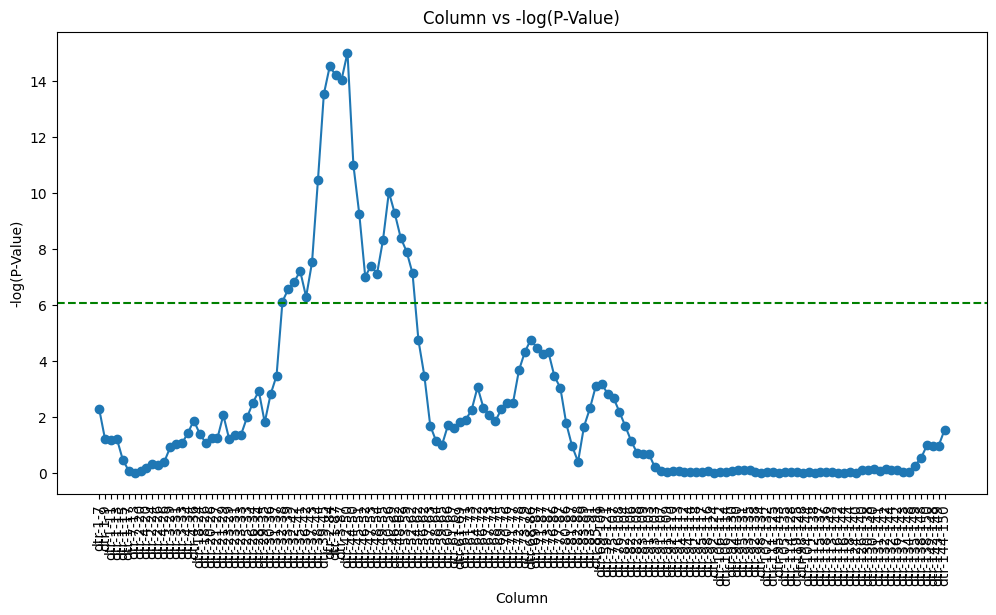

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(result_df_dtr['Column'], result_df_dtr['-log(P-Value)'], marker='o')
plt.xlabel('Column')
plt.ylabel('-log(P-Value)')
plt.xticks(rotation=90)
plt.axhline(y=6.0540765573, color='g', linestyle='--')
plt.title('Column vs -log(P-Value)')
plt.show()

###PRDTR###

In [9]:

# List of locations
locations = ['Aberdeen','Ashton','Idaho Falls','Rupert','Soda Springs']


  

#locations = ['Almira','Anatone']

result_dfs = []  

for location in locations:
    climate_df = pd.read_excel(f'./{location}_prdtr.xlsx')  
    f1_T = climate_df.set_index('window').transpose()

    trait_df = pd.read_excel(f'./{location}_Grain_yield.xlsx')
    df1_transposed = trait_df.set_index('Location').transpose()
    df1_melted = df1_transposed.melt(value_name='Value', var_name='Location')

    # Set a common index for both DataFrames
    f1_T.index = df1_melted.index
    
    # Concatenate side-by-side here
    result_df = pd.concat([f1_T, df1_melted], axis=1) 
    
    result_dfs.append(result_df)

final_result = pd.concat(result_dfs, ignore_index=True)
# Remove rows containing NaN values
final_result = final_result.dropna()


del final_result['Location']
#print(final_result)
#final_result.to_excel('./ress.xlsx')


# Initialize the list before the loop
correlation_dfs = []

# Calculate correlation and p-value for each column with 'Value' (excluding 'Location')
correlation_values = []
p_values = []
for column in final_result.columns:
    if column != 'Value':
        correlation, p_value = pearsonr(final_result[column], final_result['Value'])
        correlation_values.append(correlation)
        p_values.append(p_value)

# Create a DataFrame with correlation and p-value for each column
correlation_df = pd.DataFrame({
    'Column': final_result.columns[~final_result.columns.isin(['Value'])],  # Exclude 'Value' column
    'Correlation': correlation_values,
    'P-Value': p_values
})

correlation_dfs.append(correlation_df)

final_correlation_result = pd.concat(correlation_dfs, ignore_index=True)

print(final_correlation_result)


#final_correlation_result.to_excel('./correlation_result.xlsx')
    
final_correlation_result[['prdtr', 'x', 'y']] = final_correlation_result['Column'].str.extract(r'(\D+)-(\d+)-(\d+)')
final_correlation_result['x'] = final_correlation_result['x'].astype(int)
final_correlation_result['y'] = final_correlation_result['y'].astype(int)

final_correlation_result['sum'] = final_correlation_result['x'] + final_correlation_result['y']
final_correlation_result['avg'] = (final_correlation_result['x'] + final_correlation_result['y']) / 2

# Filter rows where (x + y) is an even number
df_even_sum = final_correlation_result[final_correlation_result['sum'] % 2 == 0]

# Define a function to get the row with the maximum correlation (positive or negative)
def get_max_correlation_row(group):
    if group['P-Value'].max() >= abs(group['P-Value'].min()):
        return group.loc[group['P-Value'].idxmax()]
    else:
        return group.loc[group['P-Value'].idxmin()]

# Apply the function to each group
result_df_prdtr= df_even_sum.groupby('avg').apply(get_max_correlation_row)
# Calculate -log(P-Value) and add it as a new column
result_df_prdtr['-log(P-Value)'] = -np.log(result_df_prdtr['P-Value'])

# Print the result
#result_df

#plot
####################################################################






   



              Column  Correlation   P-Value
0          prdtr-1-2     0.035720  0.530267
1          prdtr-1-3     0.019449  0.732622
2          prdtr-1-4     0.059460  0.295888
3          prdtr-1-5     0.093400  0.100158
4          prdtr-1-6     0.105996  0.061903
...              ...          ...       ...
11320  prdtr-148-150     0.091684  0.106579
11321  prdtr-148-151     0.130542  0.021294
11322  prdtr-149-150     0.071687  0.207399
11323  prdtr-149-151     0.119523  0.035128
11324  prdtr-150-151     0.110509  0.051540

[11325 rows x 3 columns]


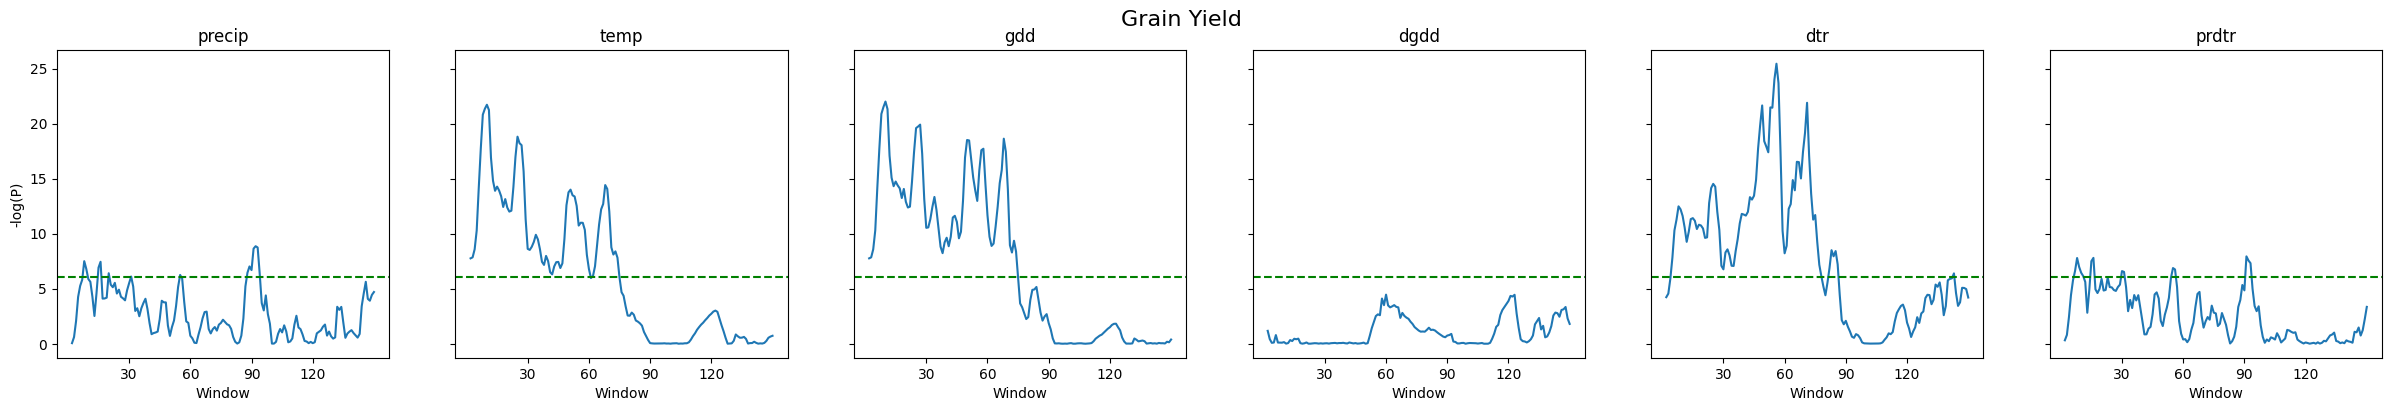

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Environment factors to plot  
env_factors = [result_df_precip['-log(P-Value)'], result_df_Tavg['-log(P-Value)'], result_df_gdd['-log(P-Value)'],
             result_df_dgdd['-log(P-Value)'],result_df_dtr['-log(P-Value)'],result_df_prdtr['-log(P-Value)']]

# Custom x-ticks
custom_ticks = [30, 60, 90, 120]

# Create plots
fig, axes = plt.subplots(ncols=len(env_factors), figsize=(30, 4), sharey=True)

# Plot each of the env_factors on each plot
for i, factor in enumerate(env_factors):
    axes[i].plot(factor)
    axes[i].set_title(f'{["precip", "temp", "gdd","dgdd","dtr","prdtr"][i]}')
    axes[i].set_xlabel('Window')
    
    # Set custom x-ticks
    axes[i].set_xticks(custom_ticks)
    #Binferroni Correction for alpha = 0.05 and for 11325*5 = 56630 tests ----> -log(0.05/56630 = 6.0540765573)
    axes[i].axhline(y=6.0540765573, color='g', linestyle='--')

# Set a single y-axis label
axes[0].set_ylabel('-log(P)')

# Set a common title for all subplots
fig.suptitle('Grain Yield', fontsize=16)
plt.savefig(f'./plots/grain yield_p.jpeg')
plt.show()


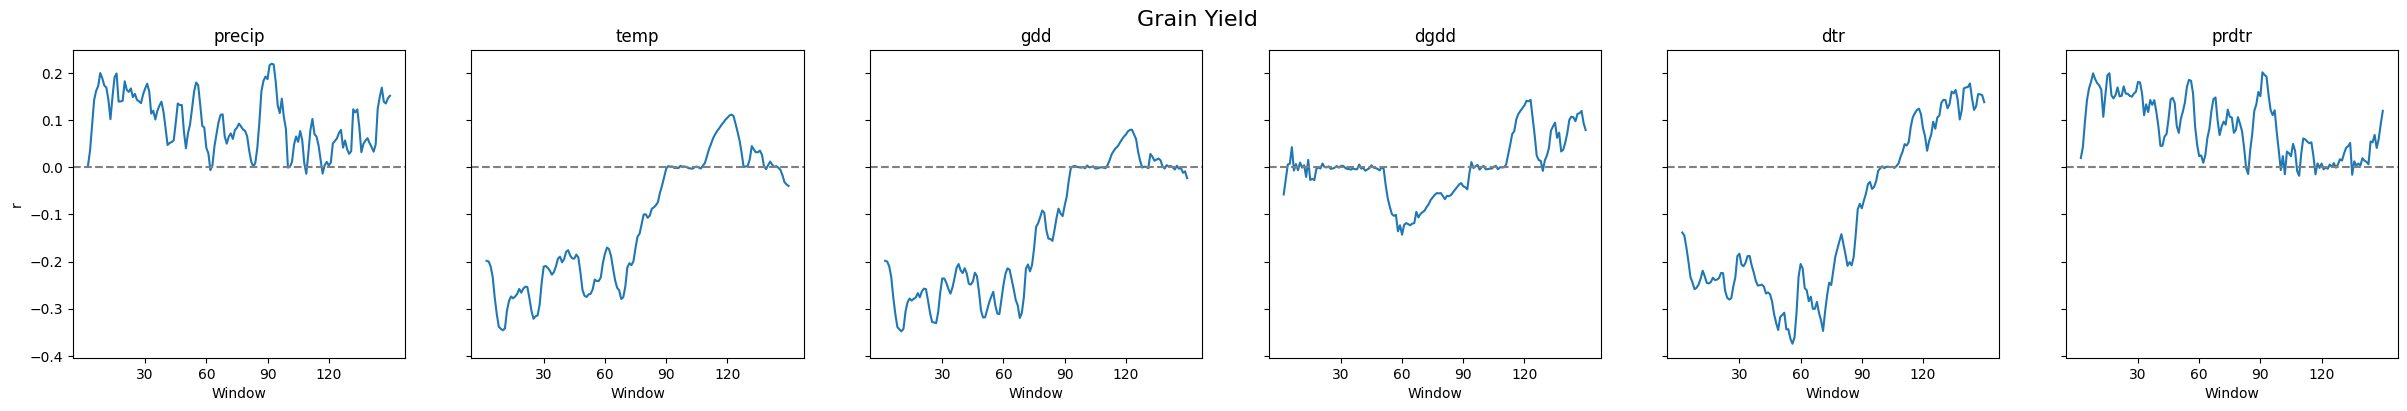

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Environment factors to plot  
env_factors = [result_df_precip['Correlation'], result_df_Tavg['Correlation'], result_df_gdd['Correlation'],
               result_df_dgdd['Correlation'],result_df_dtr['Correlation'],result_df_prdtr['Correlation']]

# Custom x-ticks
custom_ticks = [30, 60, 90, 120]

# Create plots
fig, axes = plt.subplots(ncols=len(env_factors), figsize=(30, 4), sharey=True)

# Plot each of the env_factors on each plot
for i, factor in enumerate(env_factors):
    axes[i].plot(factor)
    axes[i].set_title(f'{["precip", "temp", "gdd","dgdd","dtr","prdtr"][i]}')
    axes[i].set_xlabel('Window')
    
    # Set custom x-ticks
    axes[i].set_xticks(custom_ticks)
    axes[i].axhline(y=0, color='gray', linestyle='--')

# Set a single y-axis label
axes[0].set_ylabel('r')

# Set a common title for all subplots
fig.suptitle('Grain Yield', fontsize=16)
plt.savefig(f'./plots/grain yield_r.jpeg')
plt.show()
